In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import os
import time
import json
import math

In [2]:
#List of S&P 500 tickers from: https://stockmarketmba.com/stocksinthesp500.php

ticker_list = pd.read_csv('../datasets/SP500_index.csv')['Symbol']
ticker_list

0       AAPL
1       MSFT
2       GOOG
3      GOOGL
4       AMZN
       ...  
498     LUMN
499      ALK
500      NWL
501      VNO
502      TAP
Name: Symbol, Length: 503, dtype: object

In [3]:
def income_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
    response = requests.get(url)
    with open(os.path.join("StockRow_financials/Excel", f"{ticker}_inc.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)

def csv_maker(ticker):
    #this section reads the Excel file and turns into a CSV
    ticker_df = pd.read_excel(f'StockRow_financials/Excel/{ticker}_inc.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    ticker_df['Ticker'] = f"{ticker}"
    
    ticker_df.to_csv(f'StockRow_financials/CSV/{ticker}_inc.csv',index_label="Date")

#### This code pulls financial information from StockRow.com

In [4]:
#do not call this function unless you have 15 minutes to kill
#also note that it overwrites all the previously downloaded Excel workbooks
#start_time = time.time()
#
#for ticker in ticker_list:
#    try:
#        income_puller(ticker)
#    except:
#        print(f"Ticker {ticker} throws an error")
#    
#print(f"Code took {np.round(time.time() - start_time,2)} seconds to run")

#### This code converts the StockRow workbooks from Excel files to CSV files

In [5]:
start_time = time.time()

for ticker in ticker_list:
    try:
        csv_maker(ticker)
    except:
        print(f"Ticker {ticker} throws an error")
    
print(f"Code took {np.round(time.time() - start_time,2)} seconds to run")

Ticker AAPL throws an error
Ticker MSFT throws an error
Ticker GOOG throws an error
Ticker GOOGL throws an error
Ticker AMZN throws an error
Ticker BRK.B throws an error
Ticker TSLA throws an error
Ticker UNH throws an error
Ticker XOM throws an error
Ticker JNJ throws an error
Ticker WMT throws an error
Ticker V throws an error
Ticker NVDA throws an error
Ticker JPM throws an error
Ticker CVX throws an error
Ticker LLY throws an error
Ticker PG throws an error
Ticker MA throws an error
Ticker HD throws an error
Ticker META throws an error
Ticker BAC throws an error
Ticker PFE throws an error
Ticker ABBV throws an error
Ticker KO throws an error
Ticker MRK throws an error
Ticker PEP throws an error
Ticker COST throws an error
Ticker ORCL throws an error
Ticker TMO throws an error
Ticker AVGO throws an error
Ticker MCD throws an error
Ticker CSCO throws an error
Ticker ACN throws an error
Ticker DHR throws an error
Ticker TMUS throws an error
Ticker ABT throws an error
Ticker WFC throws

#### This code combines all downloaded CSV files (for which we have a ticker) into one Pandas DataFrame

In [6]:
starter_df = pd.read_csv(f'../StockRow_financials/CSV/{ticker_list[0]}_inc.csv')

start_time = time.time()

for ticker in ticker_list[1:]:
    try:        
        ticker_df = pd.read_csv(f'../StockRow_financials/CSV/{ticker}_inc.csv')
        starter_df = pd.concat([starter_df,ticker_df])
    except:
        print(f'Ticker {ticker} threw an error')
    
        
        
print(f"This code took {time.time() - start_time} seconds")

Ticker META threw an error
Ticker ELV threw an error
Ticker BALL threw an error
Ticker TRGP threw an error
Ticker GEN threw an error
This code took 2.8429572582244873 seconds


In [7]:
#save the DataFrame as one large CSV
starter_df.to_csv('../datasets/SP500_allFinancials.csv',index=False)

#### Narrow the financial columns, convert "Date" to a DateTime object, create a "Year" field

In [8]:
starter_df = starter_df[['Ticker', 'Date', 'Revenue', 'Gross Profit',
                         'Operating Income', 'Income after Tax', 'Net Income Common']].reset_index(drop=True)

starter_df['Date'] = pd.to_datetime(starter_df['Date'])
starter_df['Year'] = pd.DatetimeIndex(starter_df['Date']).year

In [9]:
#example of grouping the data the find the average financial values for each calendar year
starter_df[starter_df['Ticker']=='AAPL'].groupby('Year').mean()

,Revenue,Gross Profit,Operating Income,Income after Tax,Net Income Common
Year,,,,,
2012,1.646870e+11,6.901900e+10,5.511100e+10,4.174700e+10,4.174700e+10
2013,1.708525e+11,6.525800e+10,5.011225e+10,3.787200e+10,3.787200e+10
2014,1.841935e+11,7.101400e+10,5.336100e+10,4.005850e+10,4.005850e+10
2015,2.263010e+11,9.029050e+10,6.853200e+10,5.141750e+10,5.141750e+10
2016,2.203950e+11,8.646250e+10,6.224650e+10,4.734475e+10,4.734475e+10
2017,2.280935e+11,8.771550e+10,6.122750e+10,4.781425e+10,4.781425e+10
2018,2.574745e+11,9.855900e+10,6.820600e+10,5.710000e+10,5.710000e+10
2019,2.613452e+11,9.912250e+10,6.499925e+10,5.641200e+10,5.641200e+10
2020,2.776220e+11,1.064325e+11,6.831750e+10,5.924500e+10,5.924500e+10


In [10]:
#grouping the data to find average values per year for every ticker
condensed_finances_df = starter_df.groupby(['Ticker','Year']).mean()
condensed_finances_df

Revenue  Gross Profit  Operating Income  Income after Tax  \
Ticker Year                                                                   
A      2013  6.854500e+09  3.569250e+09      9.845000e+08      9.442500e+08   
       2014  5.252250e+09  2.680750e+09      6.885000e+08      4.702500e+08   
       2015  4.619250e+09  2.308250e+09      5.257500e+08      3.070000e+08   
       2016  4.116000e+09  2.130250e+09      5.877500e+08      4.672500e+08   
       2017  4.357750e+09  2.319750e+09      7.500000e+08      6.020000e+08   
...                   ...           ...               ...               ...   
ZTS    2018  5.644000e+09  3.819000e+09      1.673500e+09      1.166000e+09   
       2019  6.092500e+09  4.097500e+09      1.727250e+09      1.430500e+09   
       2020  6.474000e+09  4.500250e+09      1.967500e+09      1.631250e+09   
       2021  7.454000e+09  5.169500e+09      2.354000e+09      1.922500e+09   
       2022  7.964333e+09  5.451667e+09      2.553333e+09      2.074000e+09   

             Net Income Common  
Ticker Year                     
A      2013       9.442500e+08  
       2014       6.605000e+08  
       2015       3.390000e+08  
       2016       4.650000e+08  
       2017       6.020000e+08  
...                        ...  
ZTS    2018       1.171250e+09  
       2019       1.431000e+09  
       2020       1.632250e+09  
       2021       1.925500e+09  
       2022       2.076667e+09  

[5330 rows x 5 columns]

In [11]:
#sanity check using AAPL
condensed_finances_df.loc['AAPL']

,Revenue,Gross Profit,Operating Income,Income after Tax,Net Income Common
Year,,,,,
2012,1.646870e+11,6.901900e+10,5.511100e+10,4.174700e+10,4.174700e+10
2013,1.708525e+11,6.525800e+10,5.011225e+10,3.787200e+10,3.787200e+10
2014,1.841935e+11,7.101400e+10,5.336100e+10,4.005850e+10,4.005850e+10
2015,2.263010e+11,9.029050e+10,6.853200e+10,5.141750e+10,5.141750e+10
2016,2.203950e+11,8.646250e+10,6.224650e+10,4.734475e+10,4.734475e+10
2017,2.280935e+11,8.771550e+10,6.122750e+10,4.781425e+10,4.781425e+10
2018,2.574745e+11,9.855900e+10,6.820600e+10,5.710000e+10,5.710000e+10
2019,2.613452e+11,9.912250e+10,6.499925e+10,5.641200e+10,5.641200e+10
2020,2.776220e+11,1.064325e+11,6.831750e+10,5.924500e+10,5.924500e+10


In [12]:
execpay_df = pd.read_csv('../datasets/main_SCT_pay_file.csv')

execpay_df = execpay_df[execpay_df['ticker'].isin(ticker_list)]

execpay_df

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings,CEO,CFO,Interim
0,73b3a60ba203743c008330c96b7d8b66,1090872,A,Sam Raha,"Senior Vice President, President Diagnostics a...",2021,563500,0,1541332,0,738536,33534,3262887,NaN,False,False,False
1,97393f60cd9f321650e472673daaa70c,1090872,A,Michael R. McMullen,Chief Executive Officer,2021,1280000,0,9165390,0,3149714,77512,15967631,NaN,True,False,False
2,83b9cc2bca477fe8ce23e0ab56e70c66,1090872,A,Jacob Thaysen,"Senior Vice President, President Life Sciences...",2021,625000,0,1812285,0,897589,13684,3802349,NaN,False,False,False
3,7c60bb804071675ae15ec930f6dea190,1090872,A,Robert McMahon,"Senior Vice President, Chief Financial Officer",2021,663500,0,2291271,0,1007000,176196,4711733,NaN,False,True,False
4,259b710a8befe67c61a2c3dec14f344a,1090872,A,Padraig McDonnell,"Senior Vice President, President Cross-Lab Group",2021,495000,0,1249771,0,686716,499472,3243927,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140505,509ce14e56d662f93a33c221556bee61,829224,SBUX,Clifford Burrows,"president, Starbucks Coffee Americas and US",2011,678942,0,2050337,909284,633822,53391,4325776,NaN,False,False,False
140509,ca5ec5821d6a445f90716a3d9695b490,1393612,DFS,Harit Talwar,"EVP, President—US Cards",2010,1750000,875000,0,9292,0,0,3531442,17150.0,False,False,False
140517,5182311313ab849b40a9a5063ec9b2da,1175454,FLT,Todd W. House,"President, US Direct Business & Chief Operatin...",2010,275000,40000,787500,1293779,110000,22487,2528766,0.0,False,False,False
140520,1c4e649f102fc4f3523b36f94390bd72,14272,BMY,Anthony C. Hooper,"SVP Commercial Operations & President US, Japa...",2010,800000,0,2649962,0,1276236,267872,6148512,NaN,False,False,False


In [13]:
main_df = execpay_df.merge(condensed_finances_df,left_on=['ticker','year'], right_on=['Ticker','Year'])

In [14]:
main_df.head()

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,...,total,changeInPensionValueAndDeferredEarnings,CEO,CFO,Interim,Revenue,Gross Profit,Operating Income,Income after Tax,Net Income Common
0,73b3a60ba203743c008330c96b7d8b66,1090872,A,Sam Raha,"Senior Vice President, President Diagnostics a...",2021,563500,0,1541332,0,...,3262887,NaN,False,False,False,5.952000e+09,3.193250e+09,1.175500e+09,983750000.0,983750000.0
1,97393f60cd9f321650e472673daaa70c,1090872,A,Michael R. McMullen,Chief Executive Officer,2021,1280000,0,9165390,0,...,15967631,NaN,True,False,False,5.952000e+09,3.193250e+09,1.175500e+09,983750000.0,983750000.0
2,83b9cc2bca477fe8ce23e0ab56e70c66,1090872,A,Jacob Thaysen,"Senior Vice President, President Life Sciences...",2021,625000,0,1812285,0,...,3802349,NaN,False,False,False,5.952000e+09,3.193250e+09,1.175500e+09,983750000.0,983750000.0
3,7c60bb804071675ae15ec930f6dea190,1090872,A,Robert McMahon,"Senior Vice President, Chief Financial Officer",2021,663500,0,2291271,0,...,4711733,NaN,False,True,False,5.952000e+09,3.193250e+09,1.175500e+09,983750000.0,983750000.0
4,259b710a8befe67c61a2c3dec14f344a,1090872,A,Padraig McDonnell,"Senior Vice President, President Cross-Lab Group",2021,495000,0,1249771,0,...,3243927,NaN,False,False,False,5.952000e+09,3.193250e+09,1.175500e+09,983750000.0,983750000.0


In [15]:
main_df['ticker'].nunique()

485

In [16]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28440 entries, 0 to 28439
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id                                       28440 non-null  object 
 1   cik                                      28440 non-null  int64  
 2   ticker                                   28440 non-null  object 
 3   name                                     28418 non-null  object 
 4   position                                 28019 non-null  object 
 5   year                                     28440 non-null  int64  
 6   salary                                   28440 non-null  int64  
 7   bonus                                    28440 non-null  int64  
 8   stockAwards                              28440 non-null  int64  
 9   optionAwards                             28440 non-null  int64  
 10  nonEquityIncentiveCompensation           28440

In [17]:
main_df.ticker.value_counts()

A       112
MTCH     99
JCI      92
APA      90
EXC      88
       ... 
CARR     16
CME      14
AMP       5
VTRS      5
OGN       5
Name: ticker, Length: 485, dtype: int64

In [18]:
apple_df = main_df[main_df['ticker']=='AAPL']
apple_df
apple_df_2021 = apple_df[apple_df['year']==2020]
apple_df_2021
rev_2021 = apple_df_2021['Revenue']
rev_2021
# Making sure we can perform calculations with this, looking for 'float' or 'int'
type(rev_2021)

apple_df_2012 = apple_df[apple_df['year']==2012]
rev_2012 = max(apple_df_2012['Revenue'])

subtracted_rev = rev_2021-rev_2012

percent_rev_change = (subtracted_rev/rev_2012)*100

print("Revenue percentage growth over 10 years: ", percent_rev_change)

Revenue percentage growth over 10 years:  117    68.57554
118    68.57554
119    68.57554
120    68.57554
121    68.57554
Name: Revenue, dtype: float64


In [19]:
main_df_ticker_list = main_df['ticker'].unique()
main_df_ticker_list
data_2012 = []
# data_2013 = []
# data_2014 = []
# data_2015 = []
# data_2016 = []
# data_2017 = []
# data_2018 = []
# data_2019 = []
# data_2020 = []
data_2021 = []
data_change_dollars = []
data_change_percentage = []


data = {"Ticker": main_df_ticker_list,
       "Revenue 2012": data_2012,
#         "Revenue 2013": data_2013,
#         "Revenue 2014": data_2014,
#         "Revenue 2015": data_2015,
#         "Revenue 2016": data_2016,
#        "Revenue 2017": data_2017,
#         "Revenue 2018": data_2018,
#         "Revenue 2019": data_2019,
#         "Revenue 2020": data_2020,
        "Revenue 2021": data_2021,
       "Revenue Change $": data_change_dollars,
       "Revenue Change %": data_change_percentage}

for ticker in main_df_ticker_list:
    ticker_df = main_df[main_df["ticker"]==ticker]
    try:
        ticker_df_2012 = ticker_df[ticker_df["year"]==2012]
        rev_2012 = max(ticker_df_2012["Revenue"])
        data_2012.append(rev_2012)
    except:
        data_2012.append("No Data Available")
#     try:
#         ticker_df_2013 = ticker_df[ticker_df["year"]==2013]
#         rev_2013 = max(ticker_df_2013["Revenue"])
#         data_2013.append(rev_2013)
#     except:
#         data_2013.append("No Data Available")
#     try:
#         ticker_df_2014 = ticker_df[ticker_df["year"]==2014]
#         rev_2014 = max(ticker_df_2014["Revenue"])
#         data_2014.append(rev_2014)
#     except:
#         data_2014.append("No Data Available")
#     try:
#         ticker_df_2015 = ticker_df[ticker_df["year"]==2015]
#         rev_2015 = max(ticker_df_2015["Revenue"])
#         data_2015.append(rev_2015)
#     except:
#         data_2015.append("No Data Available")
#     try:
#         ticker_df_2016 = ticker_df[ticker_df["year"]==2016]
#         rev_2016 = max(ticker_df_2016["Revenue"])
#         data_2016.append(rev_2016)
#     except:
#         data_2016.append("No Data Available")
#     try:
#         ticker_df_2017 = ticker_df[ticker_df["year"]==2017]
#         rev_2017 = max(ticker_df_2017["Revenue"])
#         data_2017.append(rev_2017)
#     except:
#         data_2017.append("No Data Available")
#     try:
#         ticker_df_2018 = ticker_df[ticker_df["year"]==2018]
#         rev_2018 = max(ticker_df_2018["Revenue"])
#         data_2018.append(rev_2018)
#     except:
#         data_2018.append("No Data Available")    
#     try:
#         ticker_df_2019 = ticker_df[ticker_df["year"]==2019]
#         rev_2019 = max(ticker_df_2019["Revenue"])
#         data_2019.append(rev_2019)
#     except:
#         data_2019.append("No Data Available")
#     try:
#         ticker_df_2020 = ticker_df[ticker_df["year"]==2020]
#         rev_2020 = max(ticker_df_2020["Revenue"])
#         data_2020.append(rev_2020)
#     except:
#         data_2020.append("No Data Available")
    try:
        ticker_df_2021 = ticker_df[ticker_df['year']==2021]
        rev_2021 = max(ticker_df_2021['Revenue'])
        data_2021.append(rev_2021)
    except:
        data_2021.append("No Data Available")
    try:
        rev_change_dollars = rev_2021 - rev_2012
        data_change_dollars.append(rev_change_dollars)
    except:
        print("No calculation performed")
    try:
        rev_change_percentage = (rev_change_dollars / rev_2012)*100
        data_change_percentage.append(rev_change_percentage)
    except:
        print("No calculation performed")
        
        

new_df = pd.DataFrame(data)
new_df
no_data_2012 = new_df["Revenue 2012"] == "No Data Available" 
no_data_2021 = new_df["Revenue 2021"] == "No Data Available"
no_calc_2012 = new_df.loc[no_data_2012, ["Revenue Change $", "Revenue Change %"]] = "No Calculation Performed"
no_calc_2022 = new_df.loc[no_data_2021, ["Revenue Change $", "Revenue Change %"]] = "No Calculation Performed"
print(new_df.head(15))
print(new_df.shape)



   Ticker         Revenue 2012         Revenue 2021          Revenue Change $  \
0       A    No Data Available         5952000000.0  No Calculation Performed   
1    AAPL       164687000000.0       354175250000.0            189488250000.0   
2    MSFT        72930000000.0       172302750000.0             99372750000.0   
3    AMZN        61093000000.0  447553750000.000061       386460750000.000061   
4    TSLA          413256000.0        44618250000.0             44204994000.0   
5   GOOGL    No Data Available    No Data Available  No Calculation Performed   
6    GOOG        46039000000.0       228366750000.0            182327750000.0   
7     UNH       110618000000.0       275483250000.0            164865250000.0   
8     JNJ        67224000000.0        89659750000.0             22435750000.0   
9     XOM  480681000000.000122    No Data Available  No Calculation Performed   
10    JPM       108074000000.0       127989000000.0             19915000000.0   
11   NVDA    No Data Availab

The following code block shows that we have 84 of our 485 companies that do not have data in either 2021 or 2012. Some have both that are missing but overall, we can see that 2012 is the bigger culprit of missing revenue data.

In [20]:
print(f"Missing {new_df['Revenue 2012'].value_counts()['No Data Available']} values in 2012")
print(f"Missing {new_df['Revenue 2021'].value_counts()['No Data Available']} values in 2021")
print(f"Missing {new_df['Revenue Change $'].value_counts()['No Calculation Performed']} change history records overall")

Missing 73 values in 2012
Missing 14 values in 2021
Missing 84 change history records overall


In [21]:
index_no_calc = new_df[new_df['Revenue Change $'] == 'No Calculation Performed'].index
new_df.drop(index_no_calc , inplace=True)
new_df
# print(new_df_filtered.head(15))
# print(new_df_filtered.shape)

,Ticker,Revenue 2012,Revenue 2021,Revenue Change $,Revenue Change %
1,AAPL,164687000000.0,354175250000.0,189488250000.0,115.059628
2,MSFT,72930000000.0,172302750000.0,99372750000.0,136.257713
3,AMZN,61093000000.0,447553750000.000061,386460750000.000061,632.577791
4,TSLA,413256000.0,44618250000.0,44204994000.0,10696.757942
6,GOOG,46039000000.0,228366750000.0,182327750000.0,396.02891
...,...,...,...,...,...
478,ALK,4657000000.0,4455250000.0,-201750000.0,-4.332188
479,DVA,8186280000.0,11573402000.0,3387122000.0,41.375594
481,VNO,2649217100.0,1524119500.0,-1125097600.0,-42.46906
482,DISH,13181334000.0,17680414750.0,4499080750.0,34.132211


In [22]:
# Performing a rank on who grew the most and least, by percentage growth not overall growth
new_df['Growth_Rank'] = new_df['Revenue Change %'].rank(ascending=False)
new_df

# Sorting the rank
rslt_df = new_df.sort_values(by = 'Growth_Rank')
# There are three rows with NaN for 2021 Revenue data to drop
rslt_df = rslt_df.dropna()

In [23]:
rslt_df.head(30)

,Ticker,Revenue 2012,Revenue 2021,Revenue Change $,Revenue Change %,Growth_Rank
4,TSLA,413256000.0,44618250000.0,44204994000.0,10696.757942,1.0
272,FANG,74962000.0,4948250000.0,4873288000.0,6501.011179,2.0
211,DXCM,99900000.0,2241049950.0,2141149950.0,2143.293243,3.0
78,NOW,243712000.0,5357500000.0,5113788000.0,2098.291426,4.0
139,CNC,8110000000.0,120285750000.0,112175750000.0,1383.178175,5.0
400,INCY,297059000.0,2830670425.0,2533611425.0,852.898389,6.0
117,REGN,1378477100.0,12799075000.0,11420597900.0,828.493843,7.0
70,NFLX,3609281800.0,28076899750.0,24467617950.0,677.908218,8.0
279,EPAM,433799000.0,3239886500.0,2806087500.0,646.863524,9.0
3,AMZN,61093000000.0,447553750000.000061,386460750000.000061,632.577791,10.0


In [24]:
rslt_df[rslt_df['Revenue Change %']< 0].count()

Ticker              70
Revenue 2012        70
Revenue 2021        70
Revenue Change $    70
Revenue Change %    70
Growth_Rank         70
dtype: int64

In [25]:
print(f"Median of Percent Revenue Change is {rslt_df['Revenue Change %'].median()}")
print(f"Mean of Percent Revenue Change is {rslt_df['Revenue Change %'].mean()}")

Median of Percent Revenue Change is 52.98032445273718
Mean of Percent Revenue Change is 148.36562357985858


In [26]:
rslt_df['Label'] = ['Growing Company' if x >= 0
                    else 'Declining Company' 
                    for x in rslt_df['Revenue Change %']]
rslt_df['Label'].value_counts()

Growing Company      328
Declining Company     70
Name: Label, dtype: int64

In [27]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
main_df.drop(columns=['id','cik']).describe()

,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings,Revenue,Gross Profit,Operating Income,Income after Tax,Net Income Common
count,28440.000,28440.000,28440.000,28440.000,28440.000,28440.000,28440.000,28440.000,7916.000,28391.000,28391.000,28391.000,28383.000,28391.000
mean,2016.536,708050.845,247157.337,2788048.836,5133900.833,1054066.556,369811.672,6460510.198,368241.819,22003537842.469,8935610035.979,2872279953.921,2010910872.154,1991398102.451
std,2.838,535087.855,1129601.054,5945889.230,417638114.113,1802818.586,2034402.991,16054202.265,1602080.301,43207886519.012,15990068123.088,6023958442.144,4656822212.299,4601965377.192
min,2012.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,74962000.000,-9055250000.000,-30363000000.000,-17760750000.000,-19353750000.000
25%,2014.000,467806.750,0.000,567270.000,0.000,219625.250,16694.000,2465628.250,0.000,3803393162.500,1705563475.000,548985800.000,336950000.000,333360000.000
50%,2017.000,618238.500,0.000,1425909.500,93479.500,611845.000,61081.500,4083627.000,0.000,8788911500.000,3680000000.000,1194250000.000,786900000.000,787175000.000
75%,2019.000,851721.250,0.000,3250000.250,757940.750,1254000.000,175333.500,7531302.250,110862.000,19465250000.000,8877500000.000,2872750000.000,1996993775.000,2010000000.000
max,2022.000,20000000.000,72054874.000,276612072.000,49999911100.000,102107461.000,136595887.000,2284044884.000,62685276.000,584175750000.000,183664000000.000,103673250000.000,89587000000.000,89587000000.000


In [28]:
main_df.to_csv('../datasets/execpay_financials_sp500.csv',index=False)

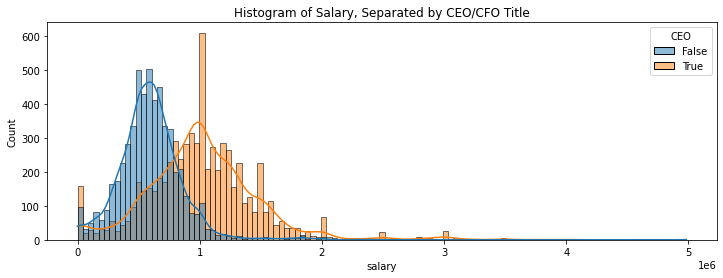

In [42]:
plt.figure(figsize=(12,4))
sns.histplot(data=main_df[((main_df['CEO']==True) | (main_df['CFO']==True)) & (main_df['salary'] < 5000000)],x='salary',hue='CEO',kde=True)
plt.title("Histogram of Salary, Separated by CEO/CFO Title")
plt.savefig('../images/salary_histogram.png')

Text(0.5, 1.0, 'Histogram of Salary, Separated by CEO/CFO Title')

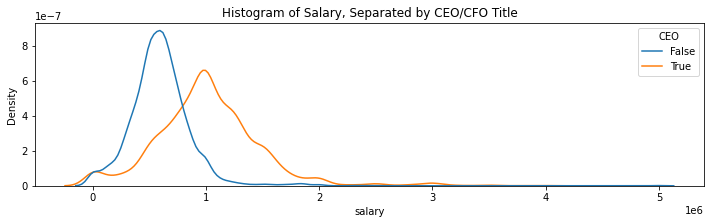

In [40]:
plt.figure(figsize=(12,3))
sns.kdeplot(data=main_df[((main_df['CEO']==True) | (main_df['CFO']==True)) & (main_df['salary'] < 5000000)],x='salary',hue='CEO')
plt.title("Histogram of Salary, Separated by CEO/CFO Title")